# Ingest Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
mc_responses_df = pd.read_csv('data/multipleChoiceResponses.csv', encoding='ISO-8859-1')

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
mc_responses_df

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
us_responses = mc_responses_df[mc_responses_df['Country'] == 'United States']

## Does Age correlate with salary?

In [65]:
us_employed = us_responses[us_responses['EmploymentStatus'] == 'Employed full-time']
temp_df = us_employed[['GenderSelect', 'Country', 'Age', 'CompensationAmount']].dropna()
to_float = lambda x: float(x.replace(',', '')) if type(x) == str else x
temp_df['CompensationAmount'] = temp_df['CompensationAmount'].apply(to_float)

In [66]:
temp_df.describe()

,Age,CompensationAmount
count,1373.000000,1.373000e+03
mean,35.805535,1.211736e+05
std,10.080546,9.793229e+04
min,1.000000,0.000000e+00
25%,28.000000,7.800000e+04
50%,33.000000,1.100000e+05
75%,41.000000,1.500000e+05
max,72.000000,2.500000e+06


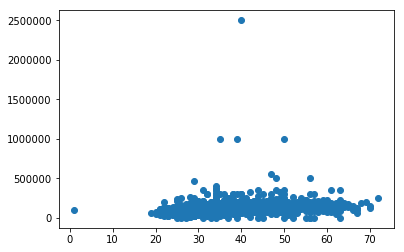

In [67]:
plt.scatter(temp_df['Age'], temp_df['CompensationAmount'])

Looks like there are some outliers making more than a million dollars. But for the vast majority of people, age seems to have little correlation with income.

In [71]:
temp_df_reg_earners = temp_df.drop(temp_df[temp_df['CompensationAmount'] > 5 * 10**6].index)

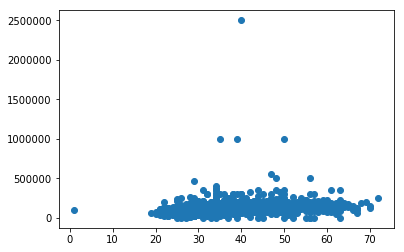

In [72]:
plt.scatter(temp_df_reg_earners['Age'], temp_df_reg_earners['CompensationAmount'])

In [73]:
non_student_df = temp_df.drop(temp_df[temp_df['CompensationAmount'] < 10].index)

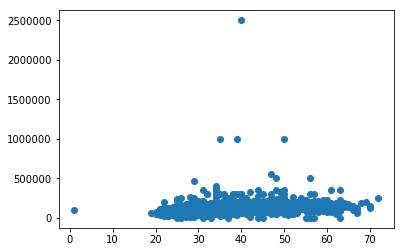

In [74]:
plt.scatter(non_student_df['Age'], non_student_df['CompensationAmount'])

Looks like we're not getting anywhere fast. But for my last trick, I'll try splitting the respondents into age buckets to see if there's some weak correlation.

In [75]:
temp_df = temp_df.join(pd.cut(temp_df['Age'], bins=5), how='outer', lsuffix='', rsuffix=' bucket')

In [76]:
temp_df.head()

,GenderSelect,Country,Age,CompensationAmount,Age bucket
22,Male,United States,33.0,100000.0,"(29.4, 43.6]"
34,Male,United States,35.0,133000.0,"(29.4, 43.6]"
75,Male,United States,40.0,215000.0,"(29.4, 43.6]"
80,Male,United States,25.0,61000.0,"(15.2, 29.4]"
86,Female,United States,31.0,83500.0,"(29.4, 43.6]"


/Users/akhiljalan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


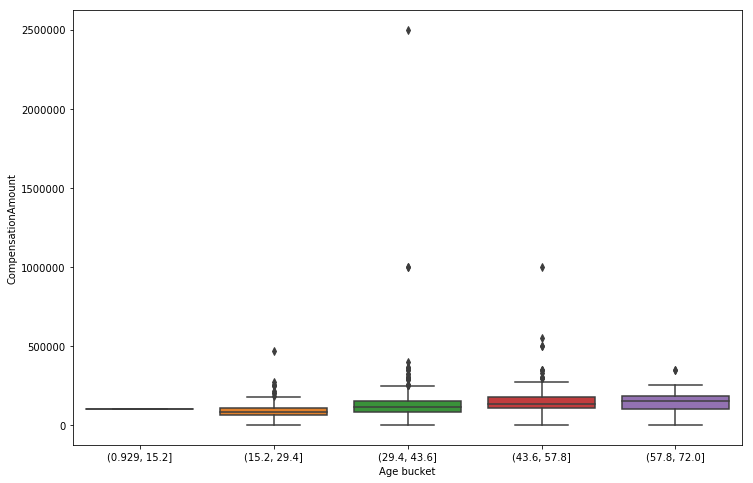

In [79]:
plt.figure(figsize=(12, 8))
temp_df.drop(temp_df[temp_df['CompensationAmount'] > 5 * 10**6].index, inplace=True)
sns.boxplot(y='CompensationAmount', x='Age bucket', data=temp_df)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Male,United States,58.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Male,United States,26.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
20,Male,United States,49.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,No,Yes,Scientist/Researcher,Fine,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
21,Male,United States,25.0,Employed part-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Male,United States,33.0,Employed full-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Male,United States,NaN,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
temp_df.drop(temp_df[temp_df['CompensationAmount'] > 5 * 10**6].index, inplace=True)
temp_df.drop(temp_df[temp_df['CompensationAmount'] > 500000].index, inplace=True)

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


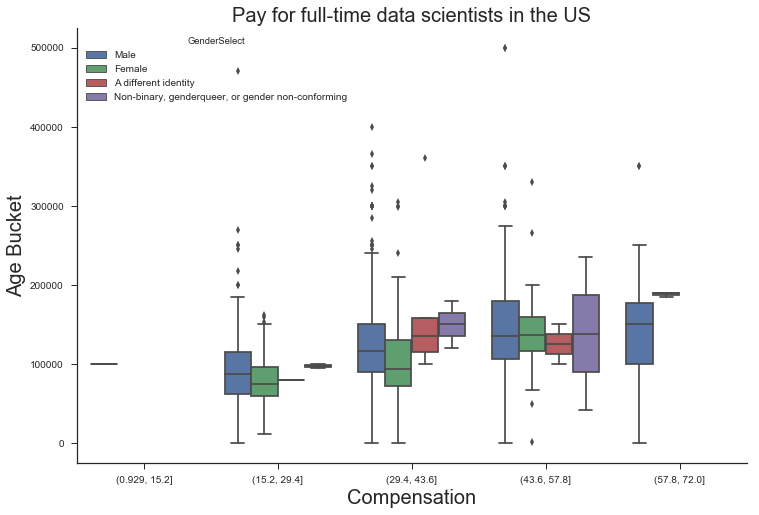

In [120]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.boxplot(y='CompensationAmount', x='Age bucket', data=temp_df, hue='GenderSelect')
plt.title('Pay for full-time data scientists in the US', fontsize=20)
plt.xlabel('Compensation', fontsize=20)
plt.ylabel('Age Bucket', fontsize=20)
sns.despine()
plt.savefig('img/pay_by_gender_nonbinary.png')

In [92]:
temp_df[temp_df['GenderSelect'] == 'A different identity']

,GenderSelect,Country,Age,CompensationAmount,Age bucket
413,A different identity,United States,37.0,135000.0,"(29.4, 43.6]"
3962,A different identity,United States,31.0,115000.0,"(29.4, 43.6]"
5570,A different identity,United States,48.0,150000.0,"(43.6, 57.8]"
6259,A different identity,United States,22.0,80000.0,"(15.2, 29.4]"
7593,A different identity,United States,36.0,100000.0,"(29.4, 43.6]"
10684,A different identity,United States,45.0,100000.0,"(43.6, 57.8]"
10876,A different identity,United States,34.0,360000.0,"(29.4, 43.6]"
11343,A different identity,United States,43.0,158000.0,"(29.4, 43.6]"


In [93]:
temp_df[temp_df['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming']

,GenderSelect,Country,Age,CompensationAmount,Age bucket
1126,"Non-binary, genderqueer, or gender non-conforming",United States,32.0,120000.0,"(29.4, 43.6]"
1155,"Non-binary, genderqueer, or gender non-conforming",United States,22.0,100000.0,"(15.2, 29.4]"
4101,"Non-binary, genderqueer, or gender non-conforming",United States,27.0,94600.0,"(15.2, 29.4]"
6459,"Non-binary, genderqueer, or gender non-conforming",United States,43.0,180000.0,"(29.4, 43.6]"
10656,"Non-binary, genderqueer, or gender non-conforming",United States,48.0,235000.0,"(43.6, 57.8]"
12430,"Non-binary, genderqueer, or gender non-conforming",United States,51.0,42000.0,"(43.6, 57.8]"


In [94]:
binary_gender_df = temp_df.drop(temp_df[temp_df['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming'].index)

In [96]:
binary_gender_df = binary_gender_df.drop(binary_gender_df[binary_gender_df['GenderSelect'] == 'A different identity'].index)

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


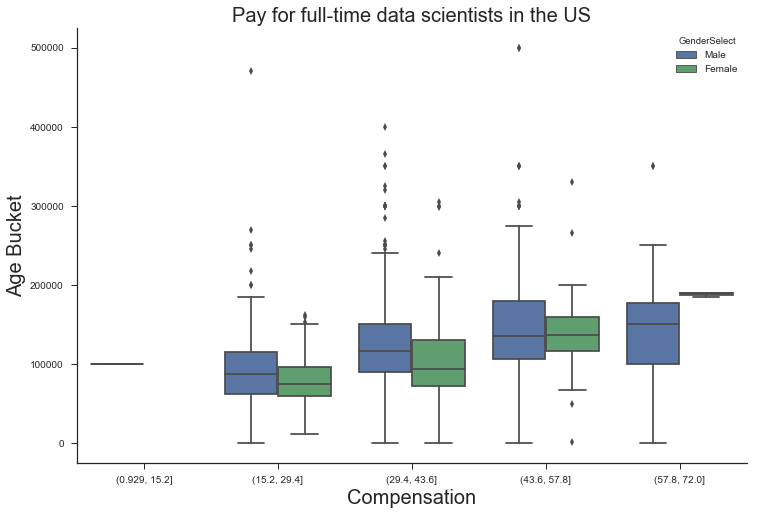

In [119]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.boxplot(y='CompensationAmount', x='Age bucket', data=binary_gender_df, hue='GenderSelect')
plt.title('Pay for full-time data scientists in the US', fontsize=20)
plt.xlabel('Compensation', fontsize=20)
plt.ylabel('Age Bucket', fontsize=20)
sns.despine()
plt.savefig('img/pay_by_gender_binary.png')

## What about other features?

In [107]:
us_employed['CurrentJobTitleSelect'].describe()

count               2654
unique                16
top       Data Scientist
freq                 696
Name: CurrentJobTitleSelect, dtype: object

In [110]:
us_employed['CurrentJobTitleSelect'].value_counts().index

Index(['Data Scientist', 'Software Developer/Software Engineer', 'Other',
       'Data Analyst', 'Scientist/Researcher', 'Business Analyst', 'Engineer',
       'Researcher', 'Machine Learning Engineer', 'Statistician',
       'Computer Scientist', 'Predictive Modeler', 'DBA/Database Engineer',
       'Programmer', 'Operations Research Practitioner', 'Data Miner'],
      dtype='object')

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


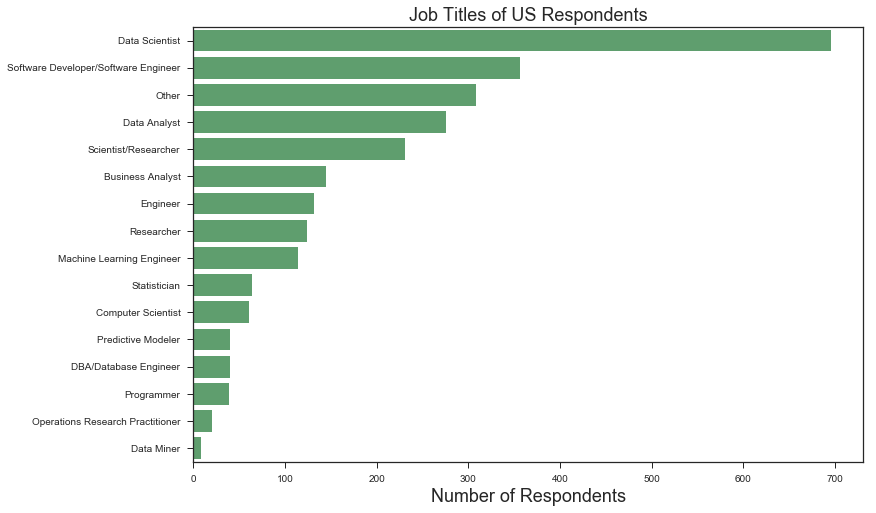

In [125]:
plt.figure(figsize=(12, 8))
sns.set_color_codes('deep')
sns.barplot(x=us_employed['CurrentJobTitleSelect'].value_counts(), 
            y=us_employed['CurrentJobTitleSelect'].value_counts().index,
            color='g')
plt.xlabel('Number of Respondents', fontsize=18)
plt.title('Job Titles of US Respondents', fontsize=18)

In [129]:
us_employed['CurrentJobTitleSelect']

6        NaN
24       NaN
40       NaN
41       NaN
48       NaN
55       NaN
59       NaN
80       HKD
87       NaN
90       NaN
115      NaN
120      NaN
126      NaN
133      NaN
138      NaN
140      NaN
142      NaN
144      NaN
176      NaN
184      NaN
210      NaN
217      NaN
232      NaN
236      NaN
248      NaN
259      NaN
260      NaN
265      NaN
273      NaN
276      NaN
        ... 
16452    NaN
16455    NaN
16456    NaN
16469    NaN
16475    NaN
16476    NaN
16479    NaN
16480    NaN
16486    NaN
16493    NaN
16498    NaN
16501    NaN
16504    NaN
16508    NaN
16511    NaN
16523    NaN
16533    NaN
16536    NaN
16553    NaN
16555    NaN
16578    NaN
16592    NaN
16594    NaN
16598    NaN
16600    NaN
16604    NaN
16611    NaN
16618    NaN
16631    NaN
16675    NaN
Name: CompensationCurrency, Length: 1828, dtype: object